In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target
images = faces.images
print(X.shape,y.shape)

(400, 4096) (400,)


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(

    X,y,
    test_size = 0.4,
    random_state = 42,
    stratify = y
)

In [6]:
X_val,X_test, y_val, y_test = train_test_split(

    X_temp, y_temp,
    random_state = 42,
    test_size = 0.5,
    stratify = y_temp,
    
)

In [7]:
k_values = range(2,20)
sil_scores = []


for k in k_values:
    kmeans  = KMeans(n_clusters=k,random_state=42)
    labels = kmeans.fit_predict(X_train)
    sil = silhouette_score(X_train,labels)
    sil_scores.append(sil)

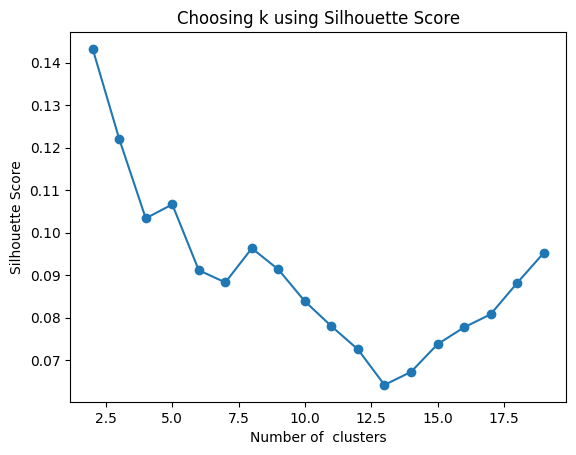

In [8]:
plt.plot(k_values, sil_scores, marker= 'o')
plt.xlabel("Number of  clusters")
plt.ylabel("Silhouette Score")
plt.title("Choosing k using Silhouette Score")
plt.show()